## 1. SOTA-модели и подходы

Описание проекта:  
https://colab.research.google.com/drive/1wGRAB_n26dHi5NRbkx91mlMC7CO8cVYk?usp=sharing#scrollTo=Zc1eyTTDq51T  
  
Face recogtinion pipeline clearly explained (medium):

 https://medium.com/backprop-labs/face-recognition-pipeline-clearly-explained-f57fc0082750

Face landmark detection using PyTorch:

  https://towardsdatascience.com/face-landmarks-detection-with-pytorch-4b4852f5e9c4

Face detection in Python:  
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

Пример метрики для подсчета качества систем распознавания лиц:

 http://www.eecs.qmul.ac.uk/~sgg/papers/ChengEtAl_PR2020.pdf (секция 3.2.3)

## Примеры кода
- с библиотекой face recognition  
comapare two faces whether those belong to one persone or not  
https://github.com/rjcoder86/Face-Recognition/tree/main  
-  с библиотекой face recognition   
https://realpython.com/face-recognition-with-python/


## 2. Загрузка и обработка данных

Библиотеки для декодирования видео: OpenCV, FFmpeg, GStreamer

In [12]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
# from skimage.io import imread, imshow

Загрузим фотографии лиц, которые уже заранее выровнены.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

!unzip -q /content/gdrive/MyDrive/celebA_train_500.zip
!rm -r __MACOSX

Mounted at /content/gdrive/


Содержимое папки с данными:

        - celebA_imgs — папка с выровненными картинками;
        - celebA_anno.txt — файл с аннотацией — каждой картинке из celebA_imgs поставлен в соответствие ее id;
        - celebA_train_split.txt — файл со сплитом на train/val/test

In [5]:
DATA_DIR = './celebA_train_500/celebA_imgs'
files = os.listdir(DATA_DIR)

print('Количество всех фото:', len(files))
for i in files[:5]:
    print(i)

Количество всех фото: 23948
022371.jpg
113602.jpg
136881.jpg
107407.jpg
070001.jpg


In [7]:
files_path = [os.path.join(DATA_DIR, file) for file in files]
# images = [imread(file) for file in files_path]

files_path[:5]

['./celebA_train_500/celebA_imgs/022371.jpg',
 './celebA_train_500/celebA_imgs/113602.jpg',
 './celebA_train_500/celebA_imgs/136881.jpg',
 './celebA_train_500/celebA_imgs/107407.jpg',
 './celebA_train_500/celebA_imgs/070001.jpg']

In [4]:
DATA_DIR = './celebA_train_500/celebA_imgs'
DATA_MODES = ['train', 'val', 'test']
RESCALE_SIZE = 224

In [32]:
class FaceDataset(Dataset):
    """
    Датасет с лицами, который паралельно подгружает их из папок
    и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        self.len_ = len(self.files)

    def __len__(self):
        return self.len_

    def load_sample(self, file):  # and prepare join
        image = np.array(Image.open(file))
        return image

    def _prepare_sample(self, image):
        # crope and resize
        image = Image.fromarray(image[77:-41, 45:-50])
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return image
        #return np.array(image)

    def __getitem__(self, index):
        if self.mode == 'train':
            # change brightness and flip
            transform = transforms.Compose([
                transforms.RandomHorizontalFlip(p=0.5),
                transforms.ColorJitter(brightness=0.3,
                                       contrast=0.3,
                                       saturation=0.3,
                                       hue=0.1),
                transforms.ToTensor(),
                # transforms.Normalize(),
                ])
        else:
            transform = transforms.Compose([
                transforms.ToTensor(),
                # transforms.Normalize(),
                ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = transform(x)
        return x #, y


In [33]:
train_dataset = FaceDataset(files_path, mode='train')
train_dataset

In [34]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
next(iter(train_loader))

Посмотрим на фотографии лиц

Размер одного изображения: (218, 178, 3)


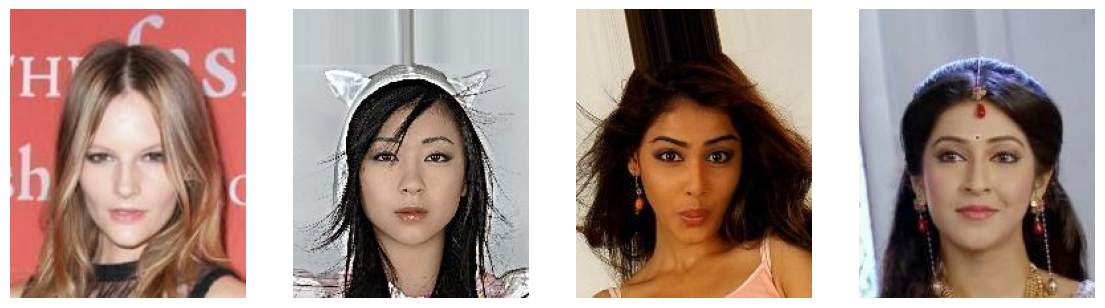

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))
for ax, image in zip(axes, images[:4]):
    ax.imshow(image)
    ax.axis('off')

print('Размер одного изображения:', images[0].shape)

Разберемся с аннотациями

In [ ]:
df_anno = pd.read_csv("celebA_train_500/celebA_anno.txt", header=None, sep=' ')
df_anno

,0,1
0,000001.jpg,0
1,000404.jpg,0
2,003415.jpg,0
3,004390.jpg,0
4,018062.jpg,0
...,...,...
12006,126297.jpg,499
12007,129725.jpg,499
12008,132679.jpg,499
12009,151415.jpg,499


In [ ]:
df_split = pd.read_csv("celebA_train_500/celebA_train_split.txt", header=None, sep=' ')
df_split

,0,1
0,000001.jpg,0
1,000404.jpg,0
2,003415.jpg,0
3,004390.jpg,0
4,018062.jpg,0
...,...,...
12006,126297.jpg,1
12007,129725.jpg,2
12008,132679.jpg,2
12009,151415.jpg,2


In [ ]:
df_anno[0].equals(df_split[0])

True

## 3. Детекция лица (face detection)

## 4. Выравнивание лица (face alignment)

We can easily apply 2D face alignment inside OpenCV in Python.

## 5. Распознавание лица (face recognition)

In [ ]:
!pip install -q torchvision catalyst
from catalyst import dl, metrics
